1. $X_t^0 = 0.4(X_{t-1}^1)^2 + \eta_t^0$
2. $X_t^1 = \eta_t^1$
3. $X_t^2 = 0.3(X_{t-2}^1)^2 + \eta_t^2$


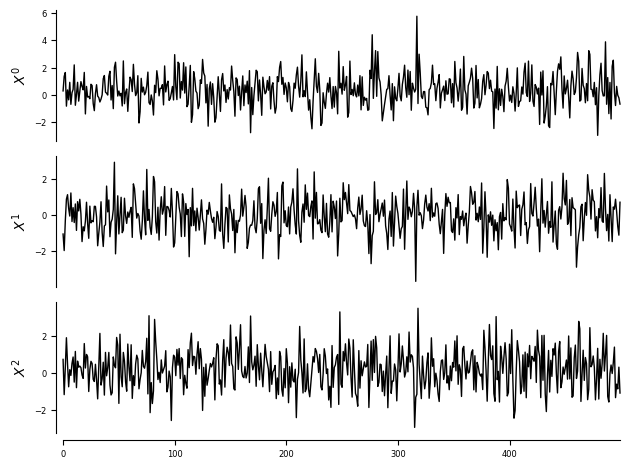

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

random_state = np.random.default_rng(seed=42)
data = random_state.standard_normal((500, 3))
for t in range(1, 500):
    data[t, 0] += 0.4*data[t-1, 1]**2
    data[t, 2] += 0.3*data[t-2, 1]**2
var_names = [r'$X^0$', r'$X^1$', r'$X^2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

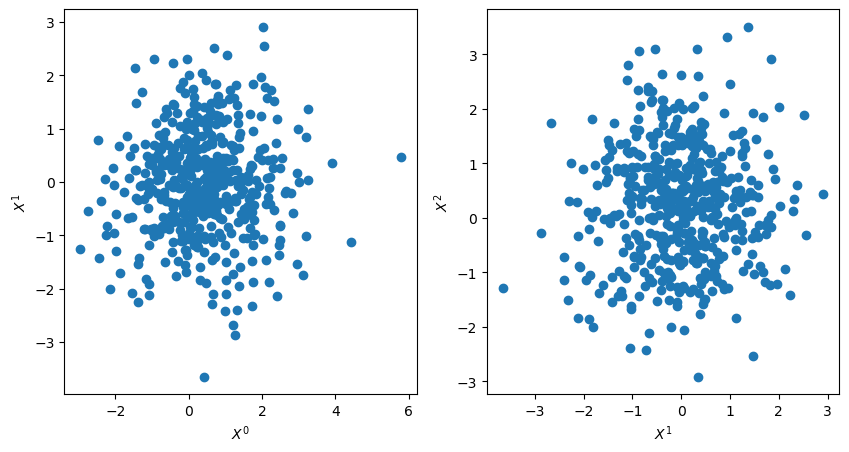

In [9]:
# plot x1 vs x0 and x2 vs x1 side by side using plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])

plt.subplot(1, 2, 2)
plt.scatter(data[:, 1], data[:, 2])
plt.xlabel(var_names[1])
plt.ylabel(var_names[2])
plt.show()


(<Figure size 640x480 with 1 Axes>, <Axes: >)

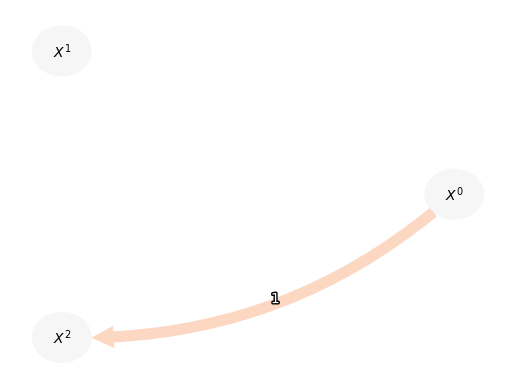

In [2]:
ParCorr = parcorr.ParCorr(significance='analytic')

pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=ParCorr,
    verbosity=0)
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2, alpha_level = 0.01)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    show_colorbar=False,
    )

(<Figure size 640x480 with 1 Axes>, <Axes: >)

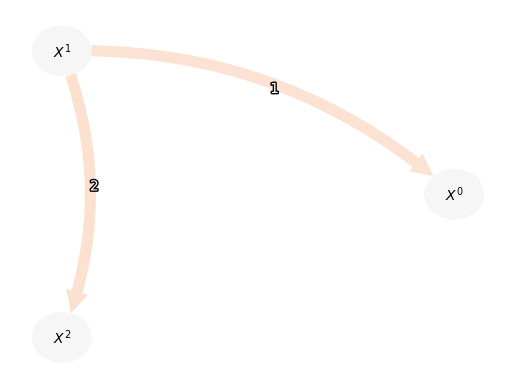

In [4]:
gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)

results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=None, alpha_level = 0.01)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    show_colorbar=False,
    )

# PCMCI using GPDC for the bipolar seesaw like data. There is a sign of false positive for Tau=100

$$
Eqation: T_{S,i+1} = T_{S,i} + \Delta t \cdot \frac{1}{\tau} [-T_{N,i} - T_{S,i}]
$$


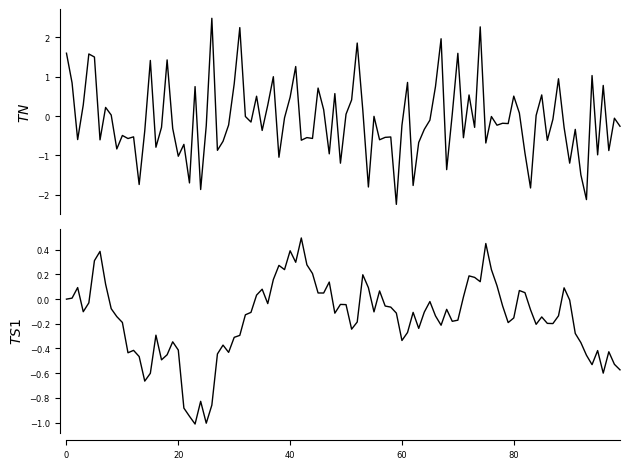

IndexError: index 2 is out of bounds for axis 1 with size 2

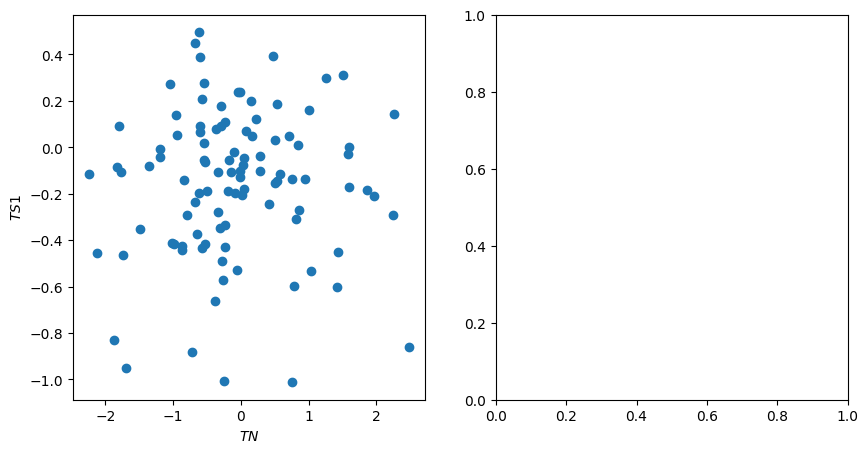

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


TN = np.random.normal(size=100)

# Parameters for the model
tau = 10  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS1 = np.zeros(len(TN))
TS2 = np.zeros(len(TN))
TS1[0] = TS_initial
TS2[0] = TS_initial

for i in range(1, len(TN)):
    TS1[i] = TS1[i-1] + (1/tau) * (-TS1[i-1] + TN[i-1])+np.random.normal(0, 0.1)
    TS2[i] = TS2[i-1] + (1/tau) * (-TS2[i-1] + TN[i-1])+np.random.normal(0, 0.1)

# data = np.array([TN, TS1, TS2]).T
data = np.array([TN, TS1]).T


var_names = [r'$TN$', r'$TS1$', r'$TS2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])

plt.subplot(1, 2, 2)
plt.scatter(data[:, 1], data[:, 2])
plt.xlabel(var_names[1])
plt.ylabel(var_names[2])
plt.show()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

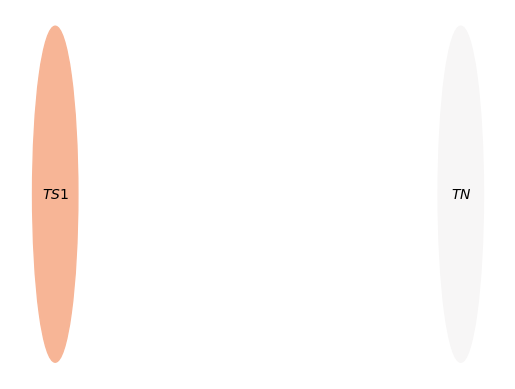

In [7]:
gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)

results = pcmci_gpdc.run_pcmci(tau_min=9,tau_max=10, pc_alpha=None, alpha_level = 0.01)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    show_colorbar=False,
    )


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


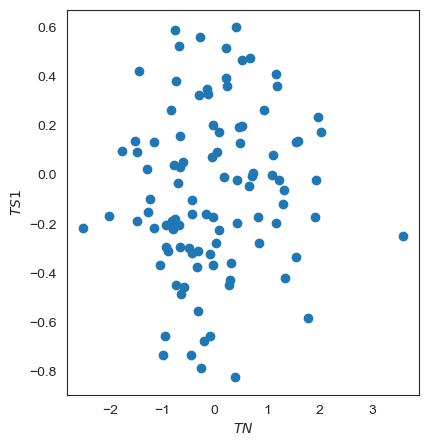

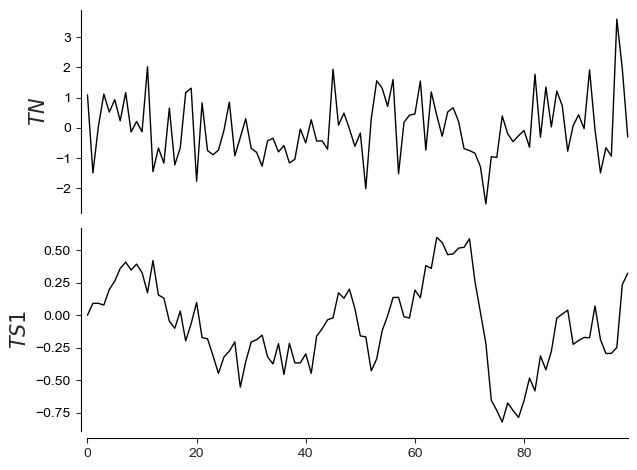

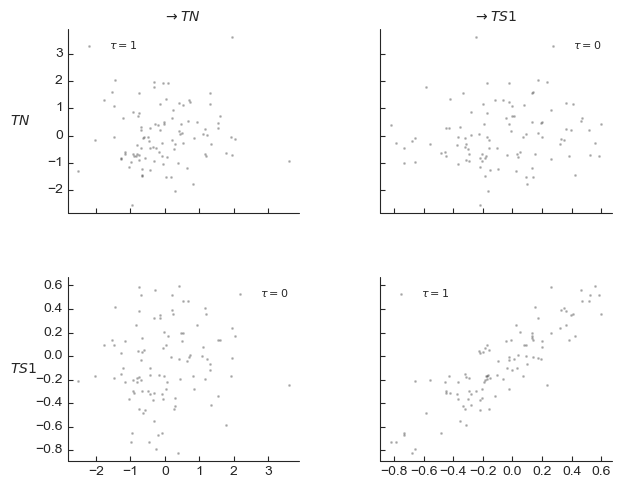

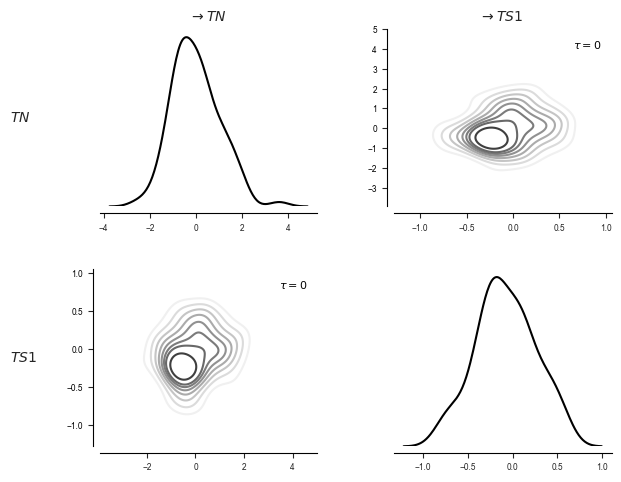


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


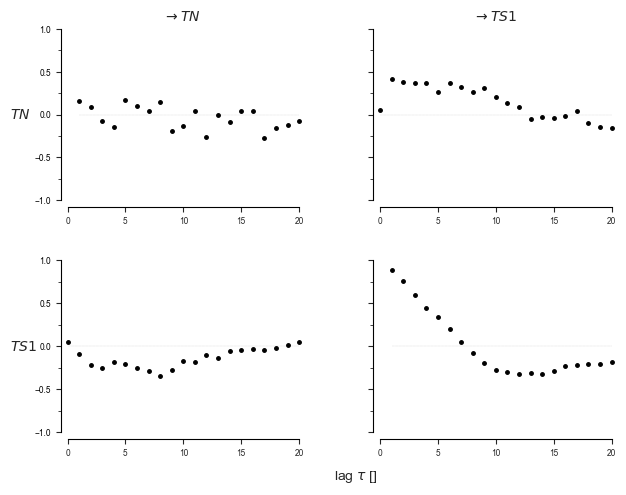

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


TN = np.random.normal(size=100)

# Parameters for the model
tau = 10  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS1 = np.zeros(len(TN))
TS2 = np.zeros(len(TN))
TS1[0] = TS_initial
TS2[0] = TS_initial

for i in range(1, len(TN)):
    TS1[i] = TS1[i-1] + (1/tau) * (-TS1[i-1] + TN[i-1])+np.random.normal(0, 0.1)
    TS2[i] = TS2[i-1] + (1/tau) * (-TS2[i-1] + TN[i-1])+np.random.normal(0, 0.1)

# data = np.array([TN, TS1, TS2]).T
data_array = np.array([TN, TS1]).T




plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_array[:, 0], data_array[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])

# plt.subplot(1, 2, 2)
# plt.scatter(data[:, 1], data[:, 2])
# plt.xlabel(var_names[1])
# plt.ylabel(var_names[2])
# plt.show()




var_names = [r'$TN$', r'$TS1$']

# dataframe = pp.DataFrame(data, var_names=var_names)
# tp.plot_timeseries(dataframe); plt.show()


# gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
# pcmci_gpdc = PCMCI(
#     dataframe=dataframe, 
#     cond_ind_test=gpdc_test,
#     verbosity=0)

# tau_max = 10
# tau_min = 9
# results = pcmci_gpdc.run_pcmci(tau_min=tau_min,tau_max=tau_max, pc_alpha=None, alpha_level = 0.01)
# tp.plot_graph(
#     val_matrix=results['val_matrix'],
#     graph=results['graph'],
#     var_names=var_names,
#     show_colorbar=False,
#     )

# create adataframe called 'df4stationary_check' with the data_array and the variable names
df4stationary_check= pd.DataFrame(data_array, columns=var_names)

dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)

parcorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_TEMP, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']

matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe_TEMP, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()


tp.plot_densityplots(dataframe=dataframe_TEMP, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()

correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 9
tau_max = 10
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $TN$ has 2 link(s):
    [pc_alpha = 0.4]
        ($TN$ -9): max_pval = 0.06194, |min_val| =  0.212
        ($TS1$ -9): max_pval = 0.38849, |min_val| =  0.099

    Variable $TS1$ has 2 link(s):
    [pc_alpha = 0.1]
        ($TN$ -9): max_pval = 0.01197, |min_val| =  0.280
        ($TS1$ -10): max_pval = 0.06126, |min_val| =  0.210

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 9
tau_max = 10
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable $TN$ has 1 link(s):
        ($TN$ -9): pval = 0.02779 | val = -0.251

    Variable $TS1$ has 2 link(s):
        ($TN$ -9): pval = 0.02471 | val =  0.256
        ($TS1$ -10): pval = 0.02972 | val = -0.24

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

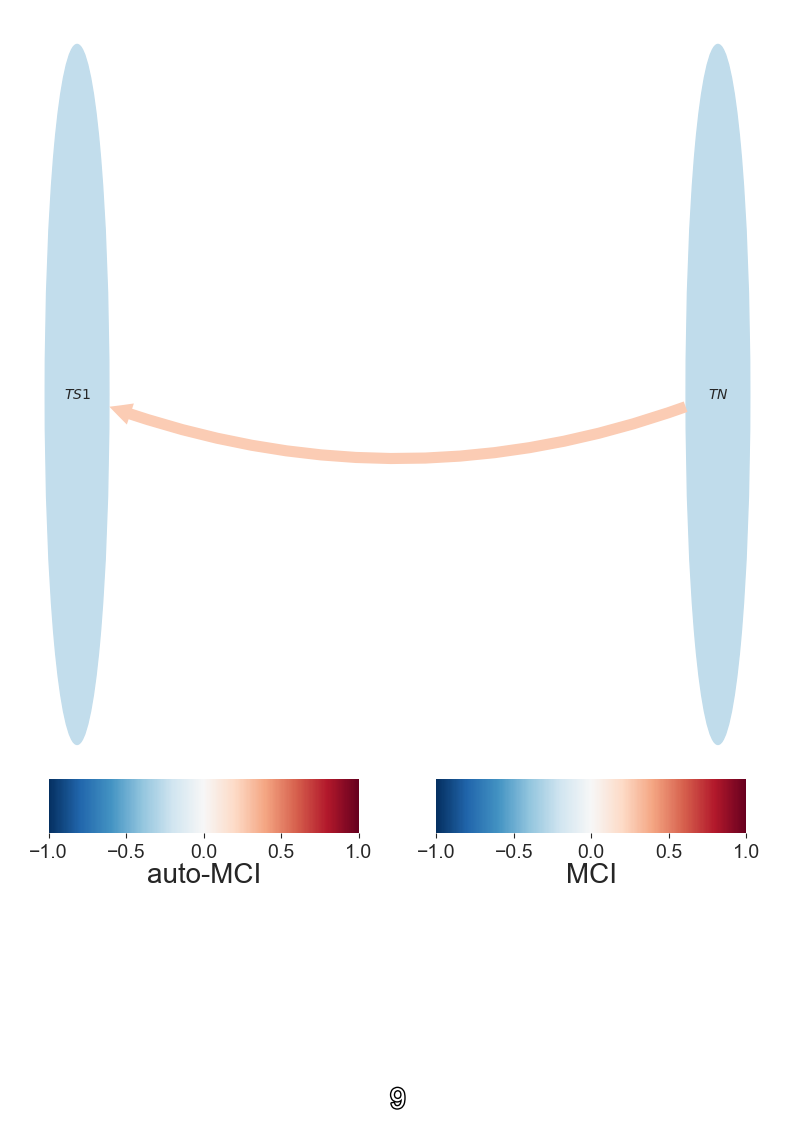

In [11]:
pcmci.verbosity = 1
tau_min=9
tau_max=10
results = pcmci.run_pcmci(tau_min=tau_min, tau_max=tau_max, pc_alpha=None)
# q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=10,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.2
    )

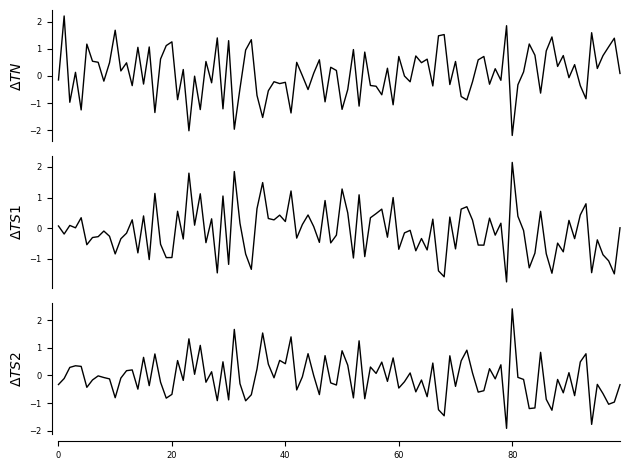

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


# Parameters
tau1 = 10  # Time constant for TS1
tau2 = 20  # Time constant for TS2
n_points = 100  # Number of points in series

# Generate random time series TN
ΔTN = np.random.normal(size=n_points)

# Generate time vector
t = np.arange(n_points)

# Calculate TS1 and TS2 with different decay factors and noise
ΔTS1 = ΔTN * (np.exp(-t / tau1) - 1) + np.random.normal(scale=0.1, size=n_points)
ΔTS2 = ΔTN * (np.exp(-t / tau2) - 1) + np.random.normal(scale=0.2, size=n_points)

# Merge TN, TS1 and TS2 into a single ndarray called data
data = np.array([ΔTN, ΔTS1, ΔTS2]).T


var_names = [r'$ΔTN$', r'$ΔTS1$', r'$ΔTS2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()


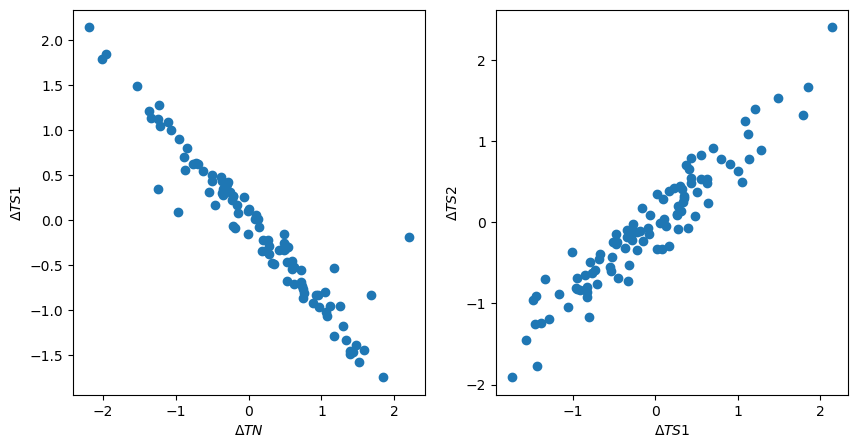

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])

plt.subplot(1, 2, 2)
plt.scatter(data[:, 1], data[:, 2])
plt.xlabel(var_names[1])
plt.ylabel(var_names[2])
plt.show()